# 🏠 Linear Regression on California Housing Dataset using PyTorch!

In this session, we’ll train a linear regression model using PyTorch on a real-world dataset. You'll learn how to:

- Load and normalize the data  
- Build a regression model with PyTorch  
- Train using SGD optimizer  
- Evaluate performance using MSE  
- Visualize predictions  


In [4]:
# 🧩 Step 1: Import Required Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


## 📥 Step 2: Load and Preprocess the Dataset


In [8]:
# 📥 Load and Preprocess Dataset
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)



> `unsqueeze(1)` makes `y` a column vector, which is necessary for `MSELoss`.


## 🧠 Step 3: Define the Linear Regression Model


In [6]:
# 🧠 Build Linear Regression Model
model = nn.Linear(X_train.shape[1], 1)
print(model)


Linear(in_features=8, out_features=1, bias=True)


> We are using `nn.Linear(input_dim=8, output_dim=1)`.


## ⚙️ Step 4: Define Loss Function and Optimizer


In [10]:
# ⚙️ Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


## 🚀 Step 5: Train the Model


In [11]:
# 🚀 Train the Model
epochs = 100
train_losses = []

for epoch in range(epochs):
    model.train()
    predictions = model(X_train)
    loss = criterion(predictions, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 6.5340
Epoch 10, Loss: 4.5197
Epoch 20, Loss: 3.2101
Epoch 30, Loss: 2.3498
Epoch 40, Loss: 1.7802
Epoch 50, Loss: 1.4004
Epoch 60, Loss: 1.1459
Epoch 70, Loss: 0.9743
Epoch 80, Loss: 0.8580
Epoch 90, Loss: 0.7787


## 📉 Step 6: Plot Training Loss


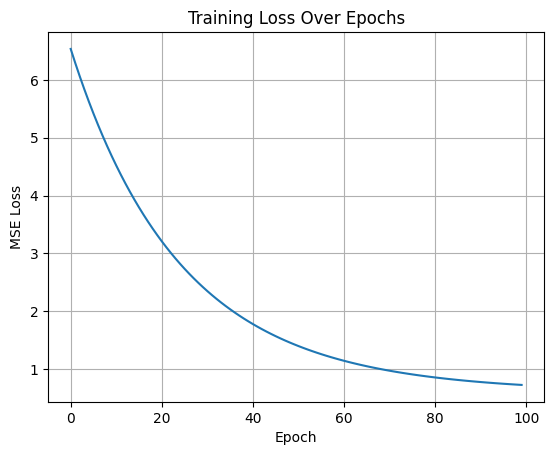

In [12]:
# 📉 Plot Training Loss
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()


## 📊 Step 7: Evaluate on Test Data


In [13]:
# 📊 Evaluate on Test Data
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

mse = criterion(y_pred, y_test)
print(f"Test MSE: {mse.item():.4f}")


Test MSE: 0.7316


## 📈 Step 8: Visualize Predictions vs Actuals


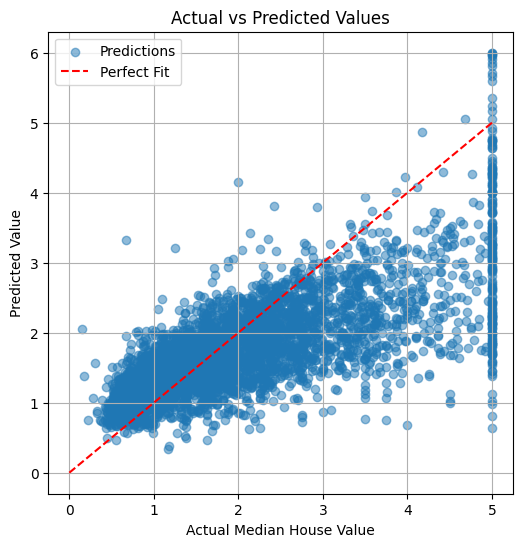

In [14]:
# 📈 Visualize Predictions vs Actuals
plt.figure(figsize=(6,6))
plt.scatter(y_test.numpy(), y_pred.numpy(), alpha=0.5, label="Predictions")
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


## ✅ Summary

- Used a real dataset (California Housing)  
- Normalized features for better training  
- Built a linear model using `nn.Linear()`  
- Optimized using SGD and evaluated with MSE  
- Visualized predictions vs actuals
